In [1]:
"""
[Logistic Regression]
It's a classification model, not a regression.
Good at linear and binary classification (Able to use OvR for multiclass classification).

Odds ratio:
p : probability of positive event
Odds ratio = p / (1 - p)
Log-odds (logit) : logit(p) = log(p / (1 - p))
    logit(p(y = 1|X)) = transpose(W) * X

Logistic function:
    Inverse logit function : logistic function (sigmoid)
        => Predict probability of some sample is in some class
        o(z) = 1 / (1 + exp(-z)) = transpose(W) * X

Quantizer:
    y-hat = if o(z) >= 0.5 then 1 else 0
          = if z >= 0 then 1 else 0

Likelihood (L):
    We want maximum of L.
    L(W) = P(Y|X;W) = Product[from i = 1 to n](P(y(i)|x(i);W))
                    = Product[from i = 1 to n]{((o(z(i))) ^ y(i)) * ((1 - o(z(i))) ^ (1 - y(i)))
    If L is too small, then 'numerical undeflow' might happend. Also, sum of factors is more easy then
        product of factors.
    => So, we need log-likelihood function.
    log-likelihood function (l):
        l(W) = log(L(W)) = Sum[from i = 1 to n]{y(i) * log(o(z(i))) + (1 - y(i)) * log(1 - o(z(i)))}

Cost function (J):
    We want minimum of J.
    Cost of weight:
        J(W) = Sum[from i = 1 to n]{-log(o(z(i))) - (1 - y(i)) * log(1 - o(z(i)))}
             = -Sum[from i = 1 to n]{log(o(z(i))) + (1 - y(i)) * log(1 - o(z(i)))}
    Cost of a single sample:
        J(o(z), y;W) = -y * log(o(z)) - (1 - y) * log(1 - o(z))
        => J(o(z), y;W) = if y = 1 then -log(o(z)) else if y = 0 then -log(1 - o(z))

Update weights:
    => ΔW = -η * ∇l(W) [η : learning rate]

Overfitting (high variance):
    High performance at training, bad performance at testing.
    Using too much features, generating model that too complex for underlying data.

Underfitting (high bias):
    Not complex enough to find pattern from training sets, bad performance at testing.

Regularization :
    Find a balance between bias and variance. Deal with collinearity(highly related between features).
    L2 regularization (weight decay):
        (λ / 2)(||w||) ^ 2 = (λ / 2)(Sum[from j = 1 to m]{(wj) ^ 2}) [λ : regularization parameter]
    Cost function w/ regularization:
        J(W) = Sum[from i = 1 to n]{-log(o(z(i))) - (1 - y(i)) * log(1 - o(z(i)))} + (λ / 2)(||w||) ^ 2
        Inverse regularization parameter : C = 1 / λ
            => J(W) = C(Sum[from i = 1 to n]{-log(o(z(i))) - (1 - y(i)) * log(1 - o(z(i)))}) + (1 / 2)(||w||) ^ 2
"""
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from shared import Plot

In [2]:
# Sigmoid
def sigmoid(z):
    """
    Sigmoid Function
    
    Parameters:
    z : list
        Input
    
    Returns:
    1 / (1 + exp(-z))
    """
    return 1.0 / (1.0 + np.exp(-z))

Plot sigmoid function...


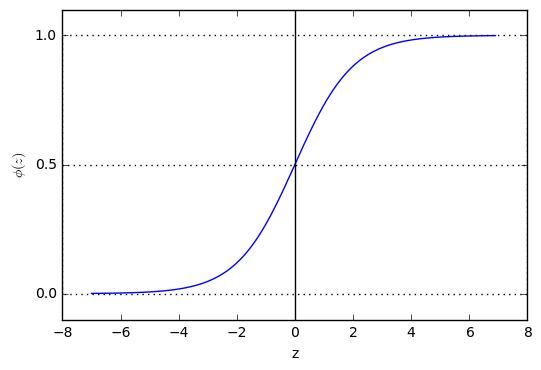

In [3]:
# Plot sigmoid
print('Plot sigmoid function...')
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

In [4]:
# Cost function
def J(phi_z, y):
    if y == 1:
        return -(np.log(phi_z))
    elif y == 0:
        return -(np.log(1 - phi_z))
    else:
        raise ValueError("y must be 0 or 1")

Plot cost function...


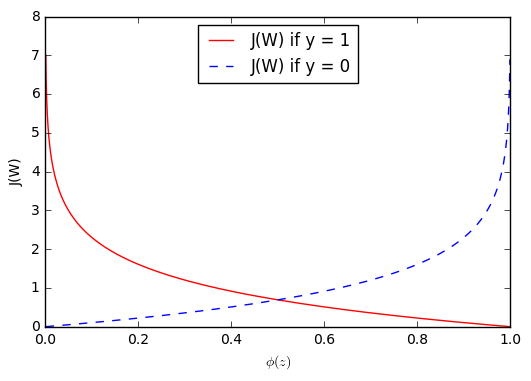

In [5]:
# Plot cost function
print('Plot cost function...')
cost_1 = J(phi_z, 1)
cost_0 = J(phi_z, 0)
line_cost_1 = plt.plot(phi_z, cost_1, 'r-', label='J(W) if y = 1')
line_cost_2 = plt.plot(phi_z, cost_0, 'b--', label='J(W) if y = 0')
plt.xlabel('$\phi (z)$')
plt.ylabel('J(W)')
plt.legend(loc='upper center')
plt.show()

In [6]:
# Get Iris data
"""
Features:
0 => sepal length in cm
1 => sepal width in cm
2 => petal length in cm
3 => petal width in cm


Target labels:
1 => Iris-Setosa
2 => Iris-Versicolor
3 => Iris-Virginica
"""
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [7]:
# Get training & test data
"""
Settings:
30 % for test, 70 % for training
"""
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [8]:
# Standarized
sc = StandardScaler()
sc.fit(X_train)  # Compute the mean and std to be used for later scaling
X_train_std = sc.transform(X_train)  # Standarized X_train
X_test_std = sc.transform(X_test)  # Standarized X_test

In [9]:
# Logistic regression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Plot results...


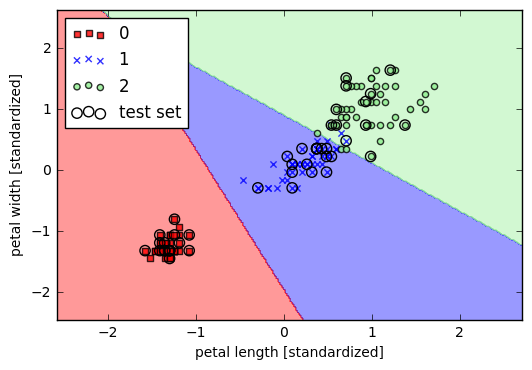

In [10]:
# Plot results
print('Plot results...')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
Plot.plot_decision_regions(X=X_combined_std, y=y_combined,
                           classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [11]:
# Get predicted probability
print('Get predicted probability...')
print(lr.predict_proba(X_test_std[0, :].reshape(1, -1)))

Get predicted probability...
[[  2.05743774e-11   6.31620264e-02   9.36837974e-01]]


Compare regularization parameter...


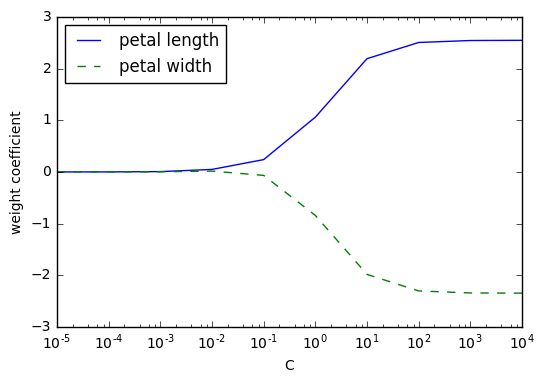

In [12]:
# Logistic regression w/ regularization
print('Compare regularization parameter...')
weights, params = [], []
for c in np.arange(-5, 5):
    C = 10 ** c
    lr = LogisticRegression(C=C, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(C)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

In [13]:
# Logistic regression w/ SGD
lr = SGDClassifier(loss='log', random_state=0)
lr.fit(X_train_std, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False)

Plot results...


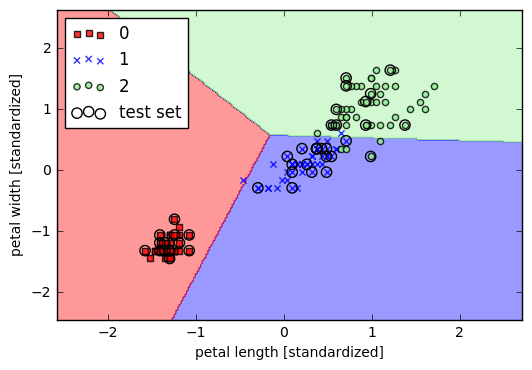

In [14]:
# Plot results
print('Plot results...')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
Plot.plot_decision_regions(X=X_combined_std, y=y_combined,
                           classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()